### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [120]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime   
%matplotlib inline

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [121]:
import warnings
warnings.filterwarnings('ignore')

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [188]:
raiting_df = pd.read_csv('Data.csv') 
movie_df = pd.read_csv('item.csv')
user_df = pd.read_csv('user.csv')

In [189]:
raiting_df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [190]:
movie_df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [191]:
movie_df.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [192]:
user_df.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

#### Apply info, shape, describe, and find the number of missing values in the raiting dataset 

In [193]:
raiting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [194]:
raiting_df.shape

(100000, 4)

In [195]:
raiting_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [196]:
raiting_df.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [197]:
raiting_df.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


#### Apply info, shape, describe, and find the number of missing values in the movie dataset 

In [198]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [199]:
movie_df.shape

(1681, 22)

In [200]:
movie_df.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
movie_df.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

#### Apply info, shape, describe, and find the number of missing values in user dataset

In [202]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [203]:
user_df.shape

(943, 5)

In [204]:
user_df.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [205]:
user_df.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [206]:
movie_df[movie_df== 1].count()#.drop(['movie id','movie title', 'release date','unknown'])

movie id          1
movie title       0
release date      0
unknown           1
Action          251
Adventure       135
Animation        42
Childrens       122
Comedy          505
Crime           109
Documentary      50
Drama           725
Fantasy          22
Film-Noir        24
Horror           92
Musical          56
Mystery          61
Romance         247
Sci-Fi          101
Thriller        251
War              71
Western          27
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [209]:
movie_df[movie_df.unknown == 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
movie_df.drop('unknown',axis=1, inplace= True)


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [143]:
movie_df['movie title'].nunique()


1658

In [144]:
movie1= movie_df.drop(['movie id','release date'],axis=1)
movie1['total_genre']= movie1.sum(axis=1)


#### movie name, number of genres for the movie in dataframe > 1

In [145]:
movie2 = movie1[['movie title','total_genre']]
movie2 = movie1[movie1['total_genre']>1]
movie2.head()

,movie title,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_genre
0,Toy Story,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,GoldenEye,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
3,Get Shorty,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3
4,Copycat,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3
6,Twelve Monkeys,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2


#### total number of movies which have more than one genres

In [26]:
movie2['movie title'].count()

849

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

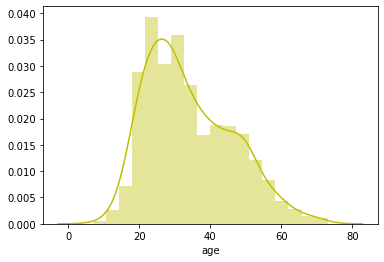

In [186]:
# ploting for age
sns.distplot(user_df['age'],color='y', kde=True)
plt.show()

In [211]:
#ploting for release year 
movie_df["Year"] = pd.to_datetime(movie_df["release date"]).dt.year  # or df["Year"] = df["release date"].str.split("-").str[-1]

In [212]:
movie_df["Year"].unique()

array([1995, 1996, 1994, 1967, 1977, 1993, 1965, 1982, 1990, 1992, 1991,
       1937, 1997, 1981, 1970, 1972, 1961, 1939, 1941, 1968, 1969, 1954,
       1971, 1988, 1973, 1979, 1987, 1986, 1989, 1974, 1980, 1985, 1966,
       1957, 1960, 1984, 1983, 1975, 1998, 1940, 1950, 1964, 1951, 1962,
       1933, 1956, 1963, 1958, 1945, 1976, 1978, 1959, 1942, 1953, 1946,
       1955, 1938, 1934, 1949, 1948, 1943, 1944, 1936, 1935, 1930, 1952,
       1931, 1922, 1947, 1932, 1926], dtype=int64)

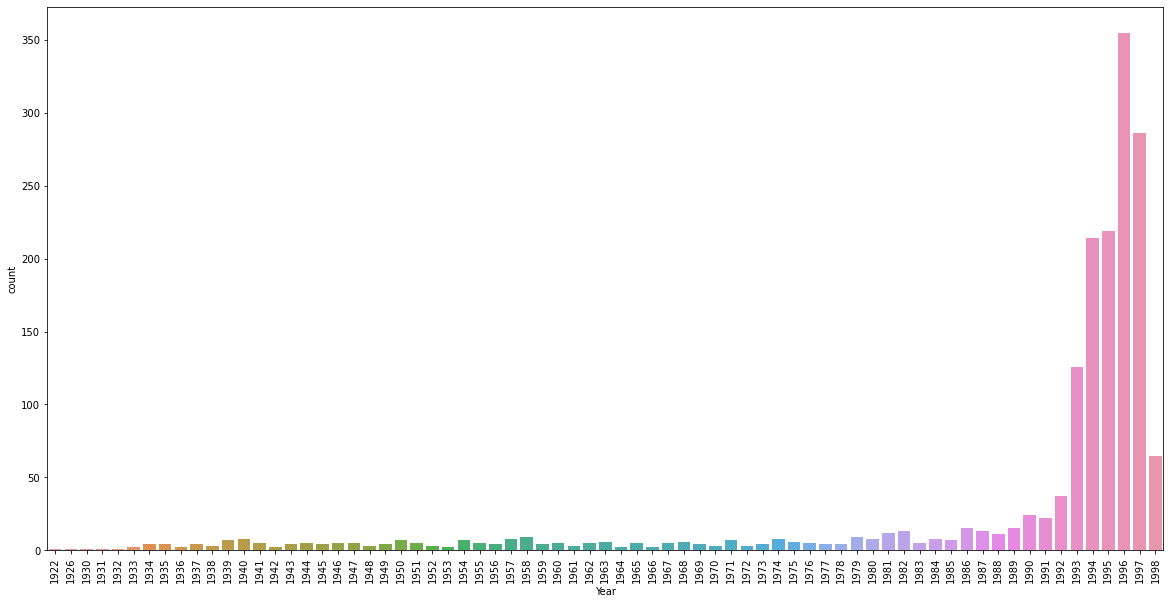

In [213]:
fig, ax = plt.subplots(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(movie_df['Year']);

In [214]:
#sns.lineplot(data=movie_df , x="Year")

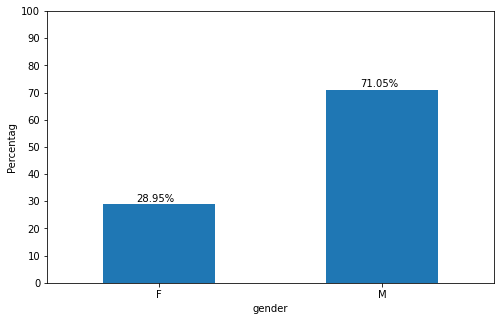

In [151]:
# Plot percentages for gender
plt.figure(figsize=(8,5))
plt.xlabel('gender')
plt.ylabel('Percentag')

ax = (user_df.gender.value_counts()/len(user_df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10));

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

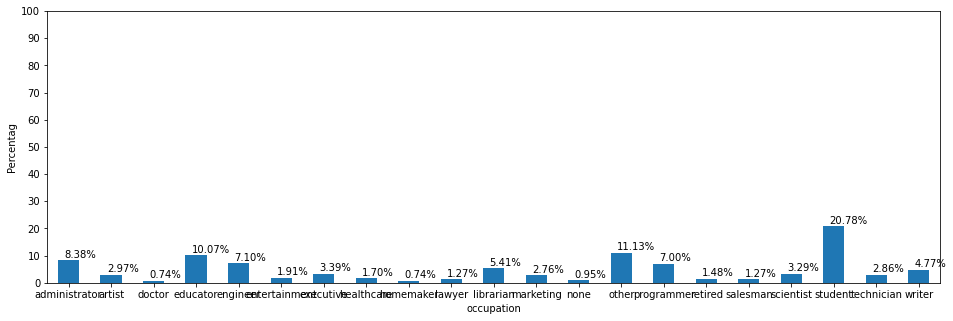

In [152]:
# Plot percentages for occupation
plt.figure(figsize=(16,5))
plt.xlabel('occupation')
plt.ylabel('Percentag')

ax = (user_df.occupation.value_counts()/len(user_df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

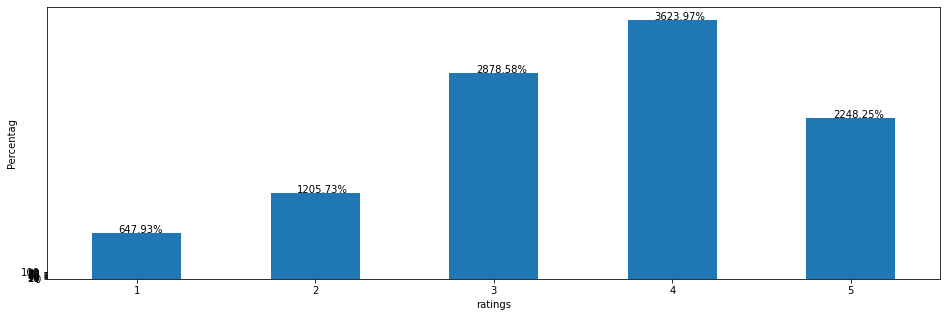

In [153]:
# Plot percentages for rating
plt.figure(figsize=(16,5))
plt.xlabel('ratings')
plt.ylabel('Percentag')

ax = (raiting_df.rating.value_counts()/len(user_df)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

In [154]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date
#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [155]:
#Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)
#movie_df.set_index("Year", inplace = True)
movie_df2= movie_df.drop(['movie title','release date', 'movie id'], axis =1)
movie_df2['Total']=movie_df2.sum(axis=1)
movie_df2.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Total
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995,1998
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995,1998
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995,1996
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995,1998
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995,1998


In [156]:
#Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.
movie_df2=movie_df2.groupby('Year').aggregate(lambda x: x.sum())
movie_df2

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Total
Year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1923
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1927
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1931
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1934
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,427069
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,437286
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,709139


In [161]:
#Hint 2: Find the total number of movies release in a year(use sum(axis=1) store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year. (df.div(df['total'], axis= 0) * 100)
movie_df2 = movie_df2.iloc[:,1:-1].div(movie_df2.iloc[:,0], axis= 0) * 100 
movie_df2

,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War
Year,,,,,,,,,,,,
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1994,9.756098,10.975610,118.292683,3.658537,0.000000,9.756098,2.439024,2.439024,42.682927,8.536585,30.487805,8.536585
1995,17.460317,7.936508,141.269841,4.761905,1.587302,22.222222,4.761905,7.936508,58.730159,23.809524,61.904762,7.936508
1996,19.444444,16.666667,157.407407,5.555556,0.925926,10.185185,8.333333,5.555556,35.185185,13.888889,43.518519,8.333333


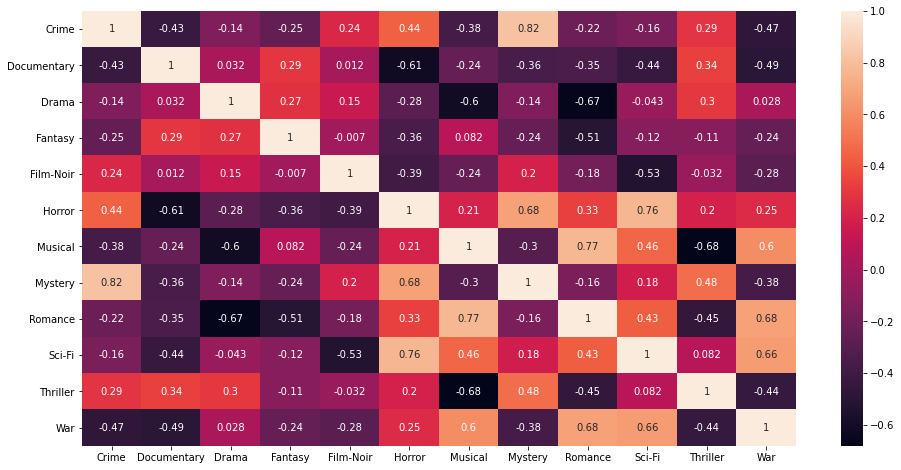

In [162]:
corr = movie_df2.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot = True)
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [163]:
rating_movie = pd.merge(raiting_df, movie_df, on='movie id')
rating_movie.head()

,user id,movie id,rating,timestamp,movie title,release date,Action,Adventure,Animation,Childrens,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,196,242,3,881250949,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1,63,242,3,875747190,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
2,226,242,5,883888671,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
3,154,242,3,879138235,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
4,306,242,5,876503793,Kolya,24-Jan-1997,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997


In [164]:
rating_movie_count= rating_movie.groupby('movie title')['rating'].count()
rating_movie_count

movie title
'Til There Was You                   9
1-900                                5
101 Dalmatians                     109
12 Angry Men                       125
187                                 41
                                  ... 
Young Guns                         101
Young Guns II                       44
Young Poisoner's Handbook, The      41
Zeus and Roxanne                     6
Á köldum klaka (Cold Fever)          1
Name: rating, Length: 1658, dtype: int64

In [165]:
rating_movie_count=pd.DataFrame(rating_movie_count)
# type(rating_movie_count)

In [166]:
rating_movie_count[rating_movie_count['rating']>100]


,rating
movie title,
101 Dalmatians,109
12 Angry Men,125
2001: A Space Odyssey,259
Absolute Power,127
"Abyss, The",151
...,...
Willy Wonka and the Chocolate Factory,326
"Wizard of Oz, The",246
"Wrong Trousers, The",118


In [167]:
rating_movie_mean= rating_movie.groupby('movie title')['rating'].mean()

In [168]:
rating_movie.groupby('movie title')['rating'].mean().sort_values(axis=0, ascending= False)[:25]

movie title
Someone Else's America                              5.000000
Marlene Dietrich: Shadow and Light (                5.000000
Great Day in Harlem, A                              5.000000
Santa with Muscles                                  5.000000
Saint of Fort Washington, The                       5.000000
Aiqing wansui                                       5.000000
Prefontaine                                         5.000000
They Made Me a Criminal                             5.000000
Entertaining Angels: The Dorothy Day Story          5.000000
Star Kid                                            5.000000
Pather Panchali                                     4.625000
Anna                                                4.500000
Some Mother's Son                                   4.500000
Everest                                             4.500000
Maya Lin: A Strong Clear Vision                     4.500000
Close Shave, A                                      4.491071
Schindler's 

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [169]:
rating_movie = pd.merge(raiting_df, movie_df, on='movie id')
all_df = pd.merge(rating_movie, user_df, on='user id').drop(['timestamp','release date'],axis=1)
all_df

,user id,movie id,rating,movie title,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Romance,Sci-Fi,Thriller,War,Western,Year,age,gender,occupation,zip code
0,196,242,3,Kolya,0,0,0,0,1,0,...,0,0,0,0,0,1997,49,M,writer,55105
1,196,257,2,Men in Black,1,1,0,0,1,0,...,0,1,0,0,0,1997,49,M,writer,55105
2,196,111,4,"Truth About Cats & Dogs, The",0,0,0,0,1,0,...,1,0,0,0,0,1996,49,M,writer,55105
3,196,25,4,"Birdcage, The",0,0,0,0,1,0,...,0,0,0,0,0,1996,49,M,writer,55105
4,196,382,4,"Adventures of Priscilla, Queen of the Desert, ...",0,0,0,0,1,0,...,0,0,0,0,0,1994,49,M,writer,55105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99986,873,313,5,Titanic,1,0,0,0,0,0,...,1,0,0,0,0,1997,48,F,administrator,33763
99987,873,326,4,G.I. Jane,1,0,0,0,0,0,...,0,0,0,1,0,1997,48,F,administrator,33763
99988,873,348,3,Desperate Measures,0,0,0,0,0,1,...,0,0,1,0,0,1998,48,F,administrator,33763
99989,873,358,2,Spawn,1,1,0,0,0,0,...,0,1,1,0,0,1997,48,F,administrator,33763


In [170]:
all_df.columns

Index(['user id', 'movie id', 'rating', 'movie title', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'Year', 'age', 'gender',
       'occupation', 'zip code'],
      dtype='object')

In [171]:
# select the columns which of our consideration to compare 
all_df_raite= all_df[['gender','rating','Drama','Sci-Fi','Romance']]
all_df_raite.head()

,gender,rating,Drama,Sci-Fi,Romance
0,M,3,0,0,0
1,M,2,0,1,0
2,M,4,0,0,1
3,M,4,0,0,0
4,M,4,1,0,0


In [172]:
# to measure how a value waited for each genre I did multiply the rating with associated genres appear 
all_df_raite[['Drama','Sci-Fi','Romance']]= all_df_raite[['Drama','Sci-Fi','Romance']].multiply(all_df_raite['rating'], axis="index")

In [173]:
#drop unseccesary column rating
all_df_raite = all_df_raite.drop('rating', axis=1)
all_df_raite

,gender,Drama,Sci-Fi,Romance
0,M,0,0,0
1,M,0,2,0
2,M,0,0,4
3,M,0,0,0
4,M,4,0,0
...,...,...,...,...
99986,F,5,0,5
99987,F,4,0,0
99988,F,3,0,0
99989,F,0,2,0


In [174]:
all_df_raite= all_df_raite.groupby('gender').sum()

In [175]:
#all_df= all_df[['gender','Drama','Sci-Fi','Romance']].groupby(['gender']).agg(['sum'])

In [176]:
all_df_raite['total']= all_df_raite.sum(axis=1)
all_df_raite

,Drama,Sci-Fi,Romance,total
gender,,,,
F,40314,9196,21415,70925
M,106794,36132,49067,191993


In [177]:
#to calculate for the percentage 
all_df_raite.div(all_df_raite['total'], axis= 0) * 100 

,Drama,Sci-Fi,Romance,total
gender,,,,
F,56.840324,12.965809,30.193867,100.0
M,55.623903,18.819436,25.556661,100.0


- Men watch more drama than women :men= 55.623903 < women= 56.840324
- Women watch more Sci-Fi than men : men= 18.819436 > women= 12.965809
- Men watch more Romance than women : men= 25.556661 < women= 30.193867